In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cxt
import geodatasets as gds   

# set style
plt.style.use('seaborn-v0_8-paper')

In [2]:
#load metadata
metadata_df = pd.read_csv('G2F_Indigo_metadata.csv')
metadata_df.head()

,sample_id,sequence_label,crop,tissue,collection_date,location,gps_latitude,gps_longitude,elevation,plant_id,plant_stage,state
0,6198.0,sample6146,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,1.0,V4,CO
1,6198.0,sample6476,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,1.0,V4,CO
2,6199.0,sample6147,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,2.0,V4,CO
3,6199.0,sample6477,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,2.0,V4,CO
4,6200.0,sample6148,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,3.0,V5,CO


In [3]:
# check columns types

metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        1619 non-null   float64
 1   sequence_label   2280 non-null   object 
 2   crop             2276 non-null   object 
 3   tissue           2276 non-null   object 
 4   collection_date  2276 non-null   object 
 5   location         2276 non-null   object 
 6   gps_latitude     2276 non-null   float64
 7   gps_longitude    2276 non-null   float64
 8   elevation        1234 non-null   float64
 9   plant_id         2257 non-null   float64
 10  plant_stage      2257 non-null   object 
 11  state            2257 non-null   object 
dtypes: float64(5), object(7)
memory usage: 213.9+ KB


In [4]:
# convert collection_date to datetime

metadata_df['collection_date'] = pd.to_datetime(metadata_df['collection_date'], format='%m/%d/%Y')

In [5]:
# shape
metadata_df.shape

(2280, 12)

In [6]:
cols_subset= ['crop', 'tissue', 'plant_stage', 'state' ]


for col in cols_subset:
    print(metadata_df[col].unique())

['Zea mays' nan]
['Leaf' 'Root' 'Root wash' 'Soil' 'Shoot' 'Rhizosphere' nan]
['V4' 'V5' 'V9' 'V10' 'Unknown' 'V6' 'V2' 'V3' 'V1' 'R6' 'V11' 'V8' 'VE'
 'V12' 'V13' nan]
['CO' 'DE' 'GA' 'IA' 'IL' 'IN' 'MI' 'MN' 'MO' 'NC' 'NE' 'NY' 'OH' 'WI'
 'MS' 'KS' 'TX' nan]


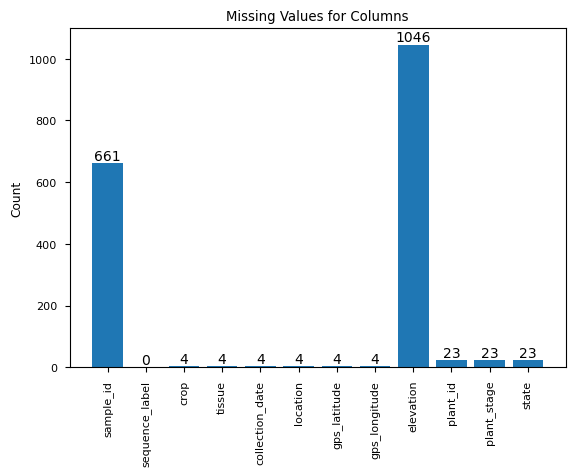

In [7]:
# Histrogram and count of missing values with matplotlib
missing = metadata_df.isnull().sum()

fig, ax = plt.subplots()
ax.bar(missing.index, missing.values)
ax.set_xticks(range(len(missing.index)), labels=missing.index, rotation=90)
ax.set_ylabel('Count')
ax.set_title('Missing Values for Columns')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


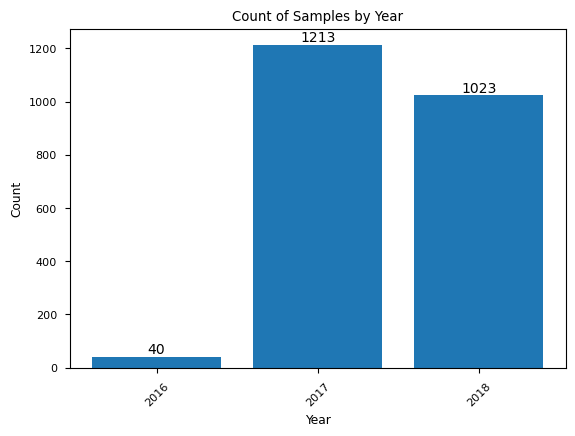

In [8]:
# Count of samples by year 


year_counts = metadata_df.loc[metadata_df['collection_date'].notnull(), 'collection_date']

year_counts = year_counts.dt.year.value_counts()

fig, ax = plt.subplots()

ax.bar(year_counts.index, year_counts.values)
ax.set_xticks(year_counts.index, labels=year_counts.index, rotation=45)
ax.set_ylabel('Count')
ax.set_xlabel('Year')
ax.set_title('Count of Samples by Year')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

In [9]:
# Select samples collected before 2017

metadata_df[metadata_df['collection_date'] < '2017-01-01'].head()

,sample_id,sequence_label,crop,tissue,collection_date,location,gps_latitude,gps_longitude,elevation,plant_id,plant_stage,state
554,6477.0,sample6285,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,1.0,V3,MI
555,6477.0,sample6615,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,1.0,V3,MI
556,6478.0,sample6286,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,2.0,V3,MI
557,6478.0,sample6616,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,2.0,V3,MI
558,6479.0,sample6287,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,3.0,V3,MI


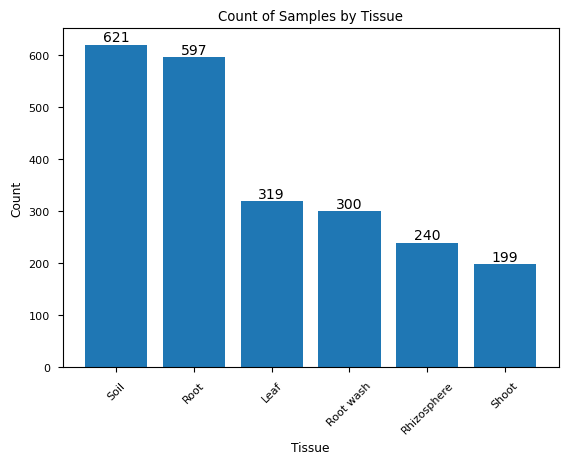

In [10]:
# sample distribution by tissue

tissue_counts = metadata_df['tissue'].value_counts()

fig, ax = plt.subplots()

ax.bar(tissue_counts.index, tissue_counts.values)
ax.set_xticks(range(len(tissue_counts.index)), labels=tissue_counts.index, rotation=45)
ax.set_ylabel('Count')
ax.set_xlabel('Tissue')
ax.set_title('Count of Samples by Tissue')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

<img src="./Corn Graphics - revised (002).png" alt="Zea Mays Growth" />

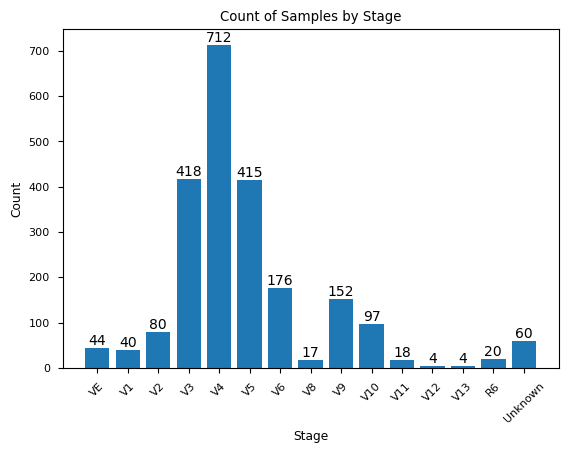

In [11]:
# Maturation list

stages = {'VE':0, 'V1':1, 'V2':2, 'V3':3, 'V4':4, 'V5':5, 'V6':6, 'V8':7, 'V9':8, 'V10':9, 'V11':10, 'V12':11, 'V13':12,
          'R6':13, 'Unknown':14}

# sample distribution by stage of corn plant

stage_counts = metadata_df['plant_stage'].value_counts()
stage_counts_df = pd.DataFrame(stage_counts)
stage_counts_df['stage'] = stage_counts_df.index
stage_counts_df = stage_counts_df.rename(index=stages).sort_index()




fig, ax = plt.subplots()

ax.bar(stage_counts_df['stage'], stage_counts_df['count'])
ax.set_xticks(range(len(stage_counts_df.index)), labels=stage_counts_df['stage'], rotation=45)
ax.set_ylabel('Count')
ax.set_xlabel('Stage')
ax.set_title('Count of Samples by Stage')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

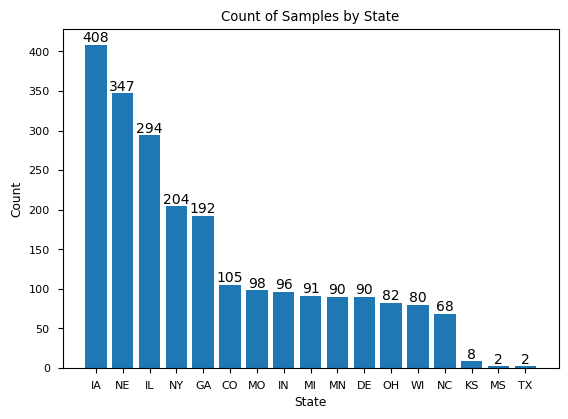

In [12]:
# distribution according to state

state_counts = metadata_df['state'].value_counts()

fig, ax = plt.subplots()

ax.bar(state_counts.index, state_counts.values)
ax.set_xticks(range(len(state_counts.index)), labels=state_counts.index)
ax.set_ylabel('Count')
ax.set_xlabel('State')
ax.set_title('Count of Samples by State')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

In [13]:
# Select coordinates and drop missing values
coordinates = metadata_df[['gps_latitude', 'gps_longitude']].dropna(axis=0, how='all')

# convert to GeoDataFrame
geo_dataframe = gpd.GeoDataFrame(
    coordinates, geometry=gpd.points_from_xy(coordinates.gps_longitude, coordinates.gps_latitude), crs="EPSG:4326"
)



In [14]:
# read US map shapefile
us_map = gpd.read_file('./tl_2023_us_state/tl_2023_us_state.shp')

# change the coordinate system of the map to match the coordinates in GeoDataFrame
us_map = us_map.to_crs("EPSG:4326")

# Peek at first entry
us_map.iloc[0,:]

REGION                                                      3
DIVISION                                                    5
STATEFP                                                    54
STATENS                                              01779805
GEOID                                                      54
GEOIDFQ                                           0400000US54
STUSPS                                                     WV
NAME                                            West Virginia
LSAD                                                       00
MTFCC                                                   G4000
FUNCSTAT                                                    A
ALAND                                             62266499712
AWATER                                              489003081
INTPTLAT                                          +38.6472854
INTPTLON                                         -080.6183274
geometry    POLYGON ((-77.75437377562777 39.3334617061683,...
Name: 0,

<Axes: >

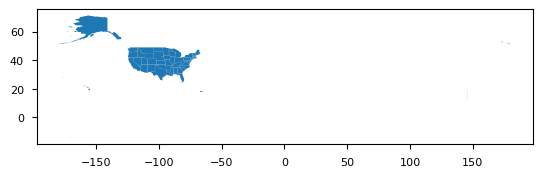

In [15]:
us_map.plot()

In [16]:
# list of non-contiguous states
not_contiguous = ['HI','VI','MP','GU','AK','AS','PR',]

# filter out non-contiguous states
us_map_contiguous = us_map[~us_map['STUSPS'].isin(not_contiguous)].reindex()

(np.float64(-100.0), np.float64(-74.0), np.float64(32.0), np.float64(46.0))

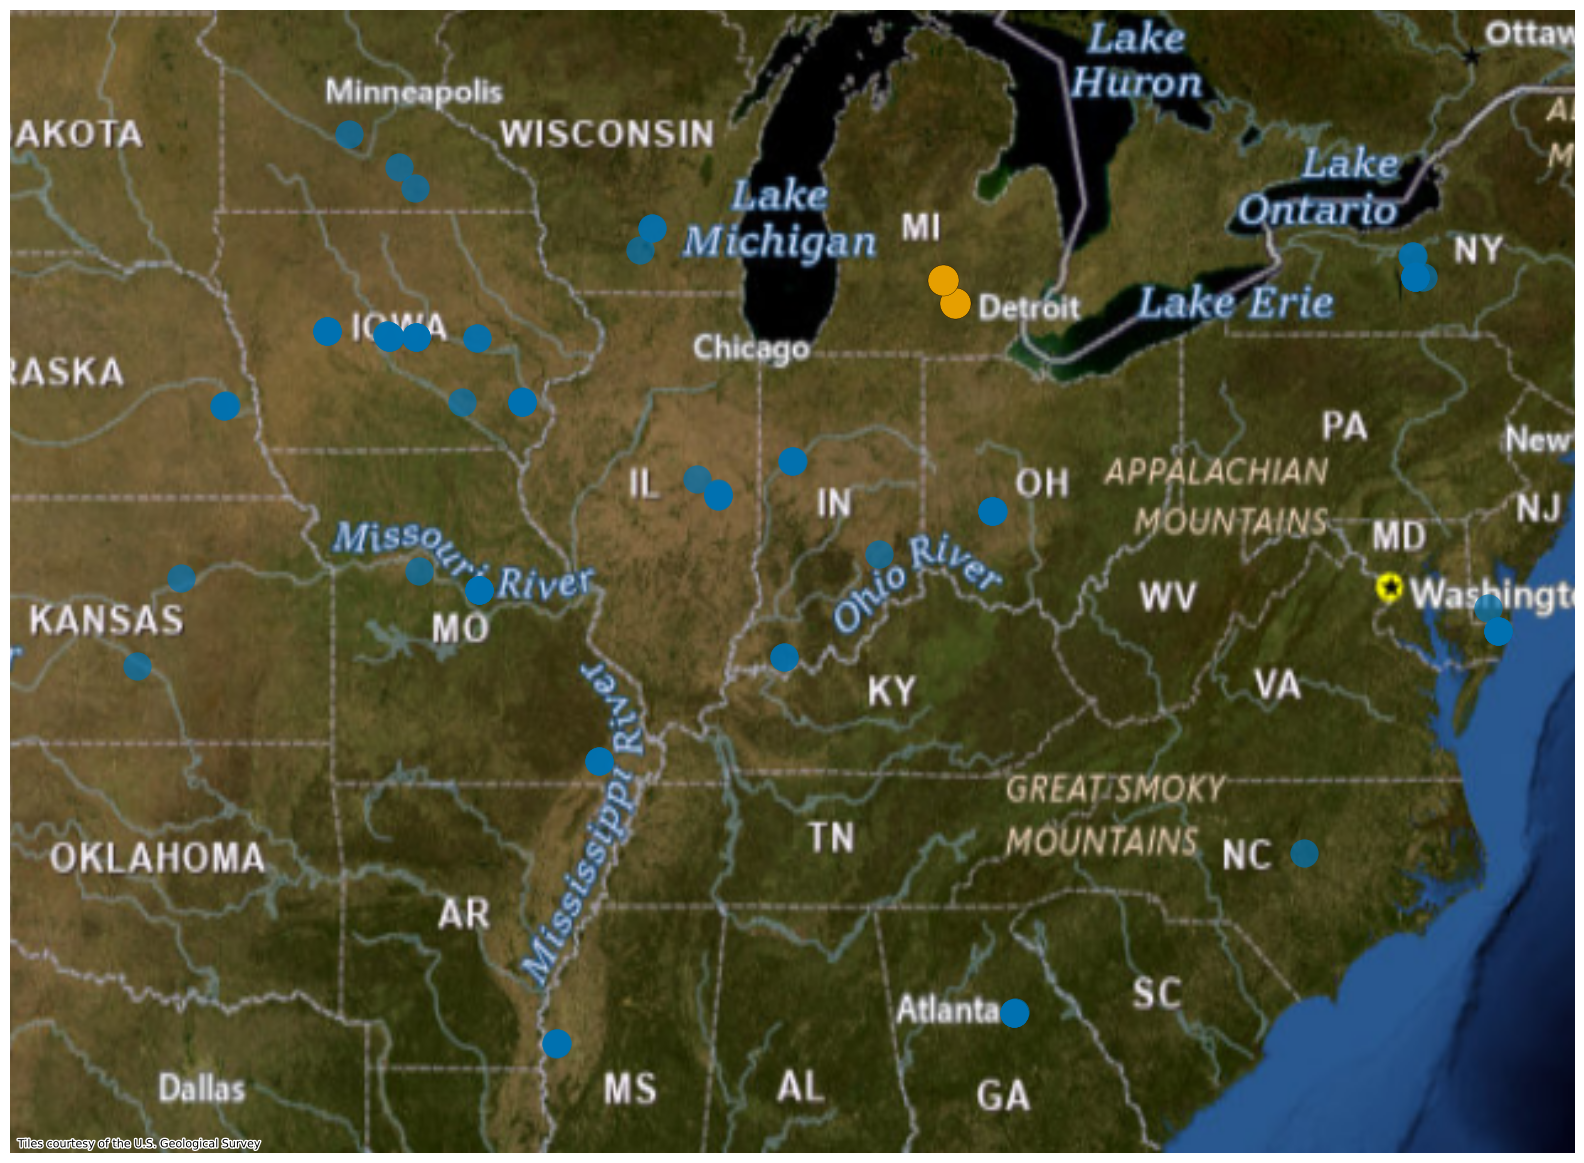

In [17]:
#Michigan geographic bounds
geo_dataframe['is_michigan'] = (geo_dataframe.geometry.x > -87.4) & (geo_dataframe.geometry.x < -82.1) & \
                              (geo_dataframe.geometry.y > 41.7) & (geo_dataframe.geometry.y < 47.2)

# Plot the map
ax = us_map_contiguous.plot(figsize=(20, 12), facecolor='none', edgecolor='none')
ax.set_xlim(-100, -74)
ax.set_ylim(32, 46)

# Color-blind friendly colors
cb_blue = '#0072B2'    # Blue
cb_orange = '#E69F00'  # Orange

# Plot non-Michigan samples
non_michigan = geo_dataframe[~geo_dataframe['is_michigan']].drop_duplicates()
non_michigan.plot(ax=ax, marker='o', color=cb_blue, markersize=400, alpha=0.7)

# Plot Michigan samples
michigan = geo_dataframe[geo_dataframe['is_michigan']].drop_duplicates()
michigan.plot(ax=ax, marker='o', color=cb_orange, markersize=500, edgecolor='black')


# Add basemap
cxt.add_basemap(ax, zoom=5, crs="EPSG:4326", source=cxt.providers.USGS.USImageryTopo)

plt.tight_layout()
plt.axis('off')

In [18]:
# Subset of metadata for Michigan samples
michigan_metadata = metadata_df[metadata_df['state'] == 'MI']

In [19]:
michigan_metadata.head(10)

,sample_id,sequence_label,crop,tissue,collection_date,location,gps_latitude,gps_longitude,elevation,plant_id,plant_stage,state
554,6477.0,sample6285,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,1.0,V3,MI
555,6477.0,sample6615,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,1.0,V3,MI
556,6478.0,sample6286,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,2.0,V3,MI
557,6478.0,sample6616,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,2.0,V3,MI
558,6479.0,sample6287,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,3.0,V3,MI
559,6479.0,sample6617,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,3.0,V3,MI
560,6480.0,sample6288,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,4.0,V3,MI
561,6480.0,sample6618,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,4.0,V3,MI
562,6481.0,sample6289,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,5.0,V3,MI
563,6481.0,sample6619,Zea mays,Leaf,2016-06-07,MIH1,42.405487,-84.293839,289.2,5.0,V3,MI


In [20]:
# print out rows that are have sequence_label duplicated for visual inspection
duplicates = michigan_metadata[michigan_metadata.duplicated(subset=['sequence_label'], keep=False)]

In [21]:
duplicates.sort_values(by='sequence_label')

,sample_id,sequence_label,crop,tissue,collection_date,location,gps_latitude,gps_longitude,elevation,plant_id,plant_stage,state
1391,11309.0,sample12836,Zea mays,Shoot,2018-06-11,MIH1,42.689945,-84.497276,NaN,105.0,V3,MI
1666,NaN,sample12836,Zea mays,Shoot,2018-06-11,MIH1,42.689945,-84.497276,NaN,105.0,V3,MI
1393,11310.0,sample12837,Zea mays,Shoot,2018-06-11,MIH1,42.689945,-84.497276,NaN,106.0,V3,MI
1667,NaN,sample12837,Zea mays,Shoot,2018-06-11,MIH1,42.689945,-84.497276,NaN,106.0,V3,MI
1668,NaN,sample12838,Zea mays,Shoot,2018-06-11,MIH1,42.689945,-84.497276,NaN,107.0,V3,MI
1395,11311.0,sample12838,Zea mays,Shoot,2018-06-11,MIH1,42.689945,-84.497276,NaN,107.0,V3,MI
1397,11312.0,sample12839,Zea mays,Shoot,2018-06-11,MIH1,42.689945,-84.497276,NaN,108.0,V3,MI
1669,NaN,sample12839,Zea mays,Shoot,2018-06-11,MIH1,42.689945,-84.497276,NaN,108.0,V3,MI
1670,NaN,sample12840,Zea mays,Root,2018-06-11,MIH1,42.689945,-84.497276,NaN,109.0,V3,MI
1398,11313.0,sample12840,Zea mays,Root,2018-06-11,MIH1,42.689945,-84.497276,NaN,109.0,V3,MI


In [22]:
mi_2017 = michigan_metadata[michigan_metadata['collection_date'] < '2017-01-01']
mi_2018 = michigan_metadata[michigan_metadata['collection_date'] >= '2017-01-01']

In [23]:
len( mi_2017), len(mi_2018)

(40, 51)

In [25]:
# remove duplicates from mi_2018
sum(mi_2018['sequence_label'].duplicated())

12

In [ ]:
# write mi_2017, mi_2018 sequence_label to csv files with no index, no header, \n line terminator and
#  drop duplicates for mi_2018

# mi_2017['sequence_label'].to_csv('mi_2017.txt', index=False, header=False, lineterminator='\n')
# mi_2018['sequence_label'].drop_duplicates().to_csv('mi_2018.txt', 
#                                                    index=False, header=False, lineterminator='\n')